# Analysis 2: Tate Bond

## Research question/interests
### How much has three point volume increased over time in the NBA, and has three-point percentage increased the same amount?
I will analyze and quantify the rise of three-point shooting in the NBA. This will include analysis of a potential increase in three point percentage, in addition to the increase in volume. In addition, we could look at how recent champions have shot the three. We could also compare the increases in three point shooting by position. We could also look at how offensive rebounding has changed over time, since three point shots tend to result in longer rebounds, and potentially fewer offensive rebounds. We can compare the data by year or by decade, to see how shooting has changed, especially in the 2010s. In addition, I will explore the evolution of the three-point shot and how its role in the game of basketball has changed substantially. The three-point has dramatically impacted how teams play the game, and I want to quantify that through my research.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="ticks", font_scale=1.3)
plt.rc("axes.spines", top=False, right=False)

In [4]:
df = pd.read_csv("../data/processed/team_totals_cleaned.csv", index_col=[0])
df_pergame = pd.read_csv("../data/processed/player_per_game_cleaned.csv")

[Text(0.5, 1.0, 'Increase in Three-Point Attempts over Time'),
 Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Number of Three Point Attempts'),
 (1980.0, 2022.0)]

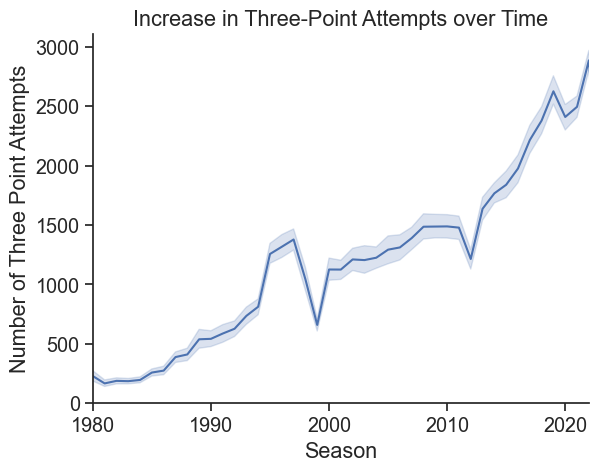

In [5]:
graph1 = sns.lineplot(df["three_point_attempts"])
graph1.set(title="Increase in Three-Point Attempts over Time", xlabel="Season", ylabel="Number of Three Point Attempts", xlim=(1980, 2022))

The first graph shows that three point attempts have increased more than sixfold since the three-point shot was introduced, and has roughly doubled since 2010. There has a been few dips, such as a notable dip around 1999 and  a smaller one around 2012, but the trend has been consistently upward.

[Text(0.5, 1.0, 'Three Point Percentage Over Time'),
 Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Three Point Percentage'),
 (1980.0, 2022.0)]

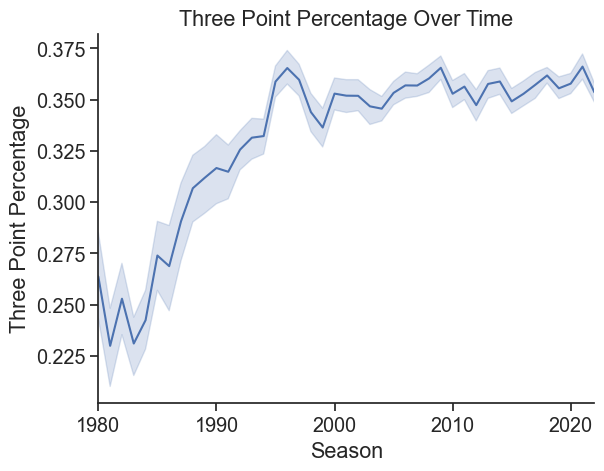

In [6]:
graph2 = sns.lineplot(df["three_point_percentage"])
graph2.set(title="Three Point Percentage Over Time", xlabel="Season", ylabel="Three Point Percentage", xlim=(1980,2022))

The second graph shows that average three point percentage were very up and down throughout the early 1980s, steadily icnreased up to around the year 2000, and have fluctuated around 30 percent ever since. Due to the higher number of attempts in recent years, however, we can conclude that overall three pointers scored have increased since 2000. Notably, there also appears to be a percentage dip in 1999 at the same time as the volume decline.

In [7]:
df_pergame = df_pergame[df_pergame.team != "TOT"]
df_pergame = df_pergame[df_pergame.season >= 1980]
df_pergame = df_pergame[df_pergame.league == "NBA"]
df_pergame.dropna(subset = ["three_pointers_per_game", "three_point_attempts_per_game", "three_point_percentage"], inplace=True)

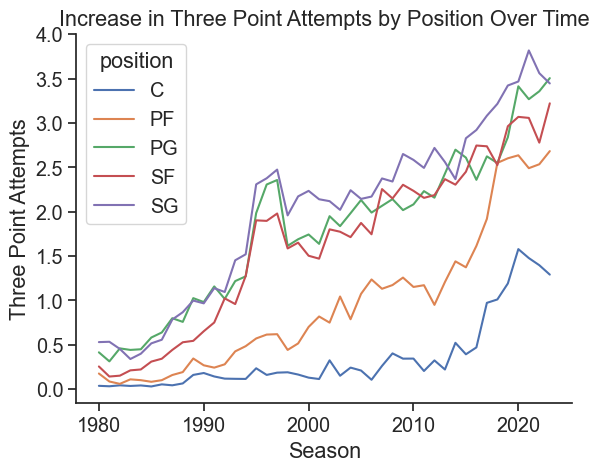

In [9]:
df_pergame.pivot_table(index='season', columns='position', values='three_point_attempts_per_game').plot()
plt.title('Increase in Three Point Attempts by Position Over Time')
plt.xlabel('Season')
plt.ylabel('Three Point Attempts')
plt.show()

The third graph shows that three point attempts for all positions have increased drastically over time. Interesting, the increased in attempts has been roughly smooth over time over time for guards and small forwards. However, the increase has been drastic in recent years for big men after minimal increases in previous years. Power forwards in particular have seen their three point attmepts increase roughly 250 percent since 2010.

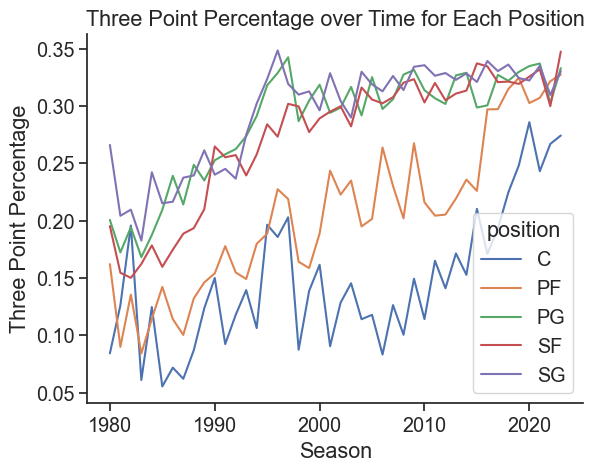

In [10]:
df_pergame.pivot_table(index='season', columns='position', values='three_point_percentage').plot()
plt.title('Three Point Percentage over Time for Each Position')
plt.xlabel('Season')
plt.ylabel('Three Point Percentage')
plt.show()

The fourth graph shows that for guards and small forwards, three point percentage increased drastically throughout the 80s and 90s, before levelling off in the low to mid 30s around the year 2000. Power forward three point percentage increased (with numerous large peaks and valleys) consistently over the period, although the increase seems to have levelled off in recent years. Centers actually saw their three point eprcentage dip in the 2000s, but their percentage has increased consistently since 2010.